In [1]:
import pandas as pd
from dataframe_utils import make_random_df

In [59]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 5)

Populating the interactive namespace from numpy and matplotlib


/home/tot/_tot/apps/anaconda3/envs/env-zipline/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dtype', 'logistic']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,price
2000-01-01 00:00:00,98.914369
2000-01-01 00:01:00,99.347387


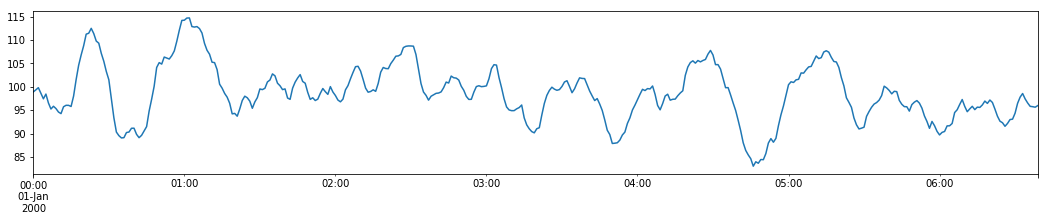

In [3]:
np.random.seed(123)
df = make_random_df(pd.DatetimeIndex(freq='1min', start='Jan 1 2000', periods=1e3))
df['price'][:400].plot(figsize=(18, 3))
df.head(2)

In [7]:
from dataframe_utils import calc_dds, calc_rmads, load_or_make_and_save_data, dropna_rows

max_dds = np.linspace(0, 0.1, 6)
rmads = [2, 4, 8, 16, 32, 64]
res = load_or_make_and_save_data('data/manual-backtest.pickle', 
                                 lambda: pd.concat([
                                  df, 
                                  calc_dds(df['price'], max_dds, spread=0.01, print_progress=5000),
                                  calc_rmads(df['price'], rmads)
                                 ], axis=1, join_axes=[df.index])
                                )

print('Min ok values among columns before dropping ends:', min(res.count().values))
res = dropna_rows(res)

print(res.shape, 'Min ok values among columns:', min(res.count().values))
res.head(3)

loaded data from file data/manual-backtest.pickle
Min ok values among columns before dropping ends: 937
(925, 43) Min ok values among columns: 925


,price,dd_price_0.0,dd_date_0.0,dd_profit_0.0,dd_datediff_0.0,dd_profit_speed_0.0,dd_price_0.02,dd_date_0.02,dd_profit_0.02,dd_datediff_0.02,...,ma_4,rmad_4,ma_8,rmad_8,ma_16,rmad_16,ma_32,rmad_32,ma_64,rmad_64
2000-01-01 01:03:00,112.893558,111.656100,2000-01-01 01:04:00,-0.010961,00:01:00,-5777.033554,108.205925,2000-01-01 01:08:00,-0.041523,00:05:00,...,114.151233,-0.011140,112.546434,0.003075,108.738117,0.036808,99.899021,0.115104,100.705350,0.107962
2000-01-01 01:04:00,112.783940,111.338796,2000-01-01 01:06:00,-0.012813,00:02:00,-3376.583044,108.205925,2000-01-01 01:08:00,-0.040591,00:04:00,...,113.782911,-0.008857,113.184327,-0.003550,109.529608,0.028855,100.505471,0.108867,100.922062,0.105173
2000-01-01 01:05:00,112.889544,111.338796,2000-01-01 01:06:00,-0.013737,00:01:00,-7239.879015,108.205925,2000-01-01 01:08:00,-0.041489,00:03:00,...,113.326800,-0.003873,113.575842,-0.006079,110.076504,0.024919,101.210954,0.103451,101.133658,0.104136


-2.83740705394 1.44878751952
(925, 6)


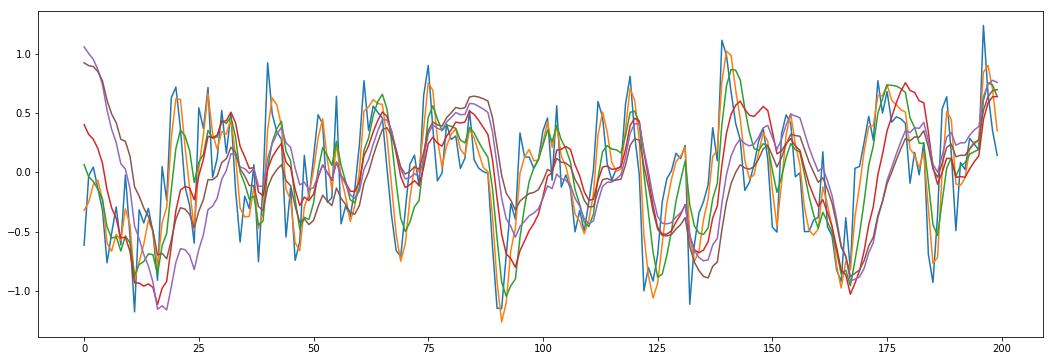

In [8]:
rmad_columns = [col for col in res if 'rmad' in col]
x = res[rmad_columns].values
x = (x - x.mean(axis=0)) / np.sqrt(x.var(axis=0)) / 2
plt.plot(x[:200])
print(x.min(), x.max())
print(x.shape)

-31254.0435529 10570.1996326
(925, 6)


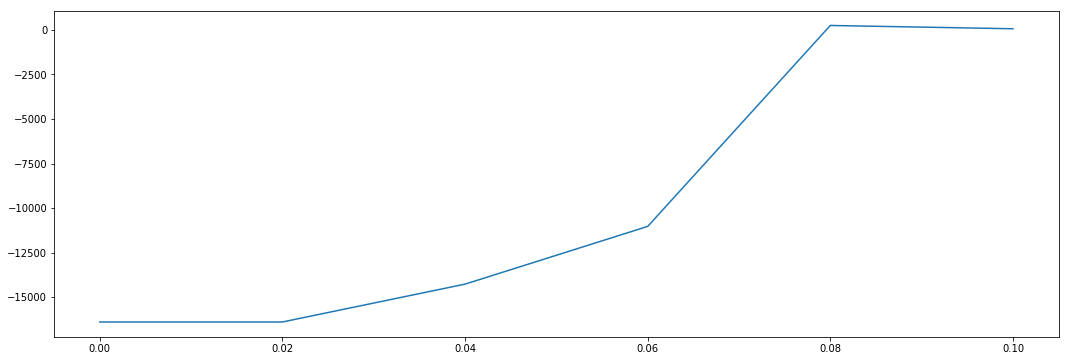

In [9]:
dd_profit_speed_columns = [col for col in res if 'dd_profit_speed' in col]
y = res[dd_profit_speed_columns].values
plt.plot(max_dds, y[163])
print(y.min(), y.max())
print(y.shape)

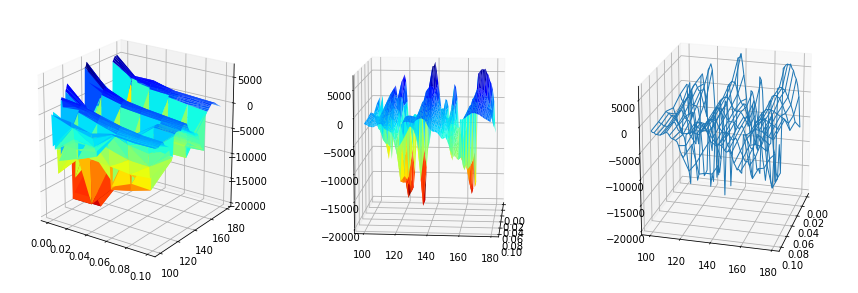

In [62]:
# %matplotlib qt
window_start = 100
window_size = 80
plot_X = max_dds
plot_Y = np.arange(window_start, window_start + window_size)
plot_Z = y[window_start:window_start + window_size]
plot_X, plot_Y = np.meshgrid(plot_X, plot_Y)
plot_X.shape, plot_Y.shape, plot_Z.shape

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(1/3)*1)
ax = fig.add_subplot(131, projection='3d')
ax.view_init(elev=20., azim=-55.)
ax.plot_trisurf(plot_X.ravel(), plot_Y.ravel(), plot_Z.ravel(), linewidth=0.1, cmap='jet_r')
ax2 = fig.add_subplot(132, projection='3d')
ax2.view_init(elev=10., azim=5.)
ax2.plot_trisurf(plot_X.ravel(), plot_Y.ravel(), plot_Z.ravel(), cmap='jet_r')
ax3 = fig.add_subplot(133, projection='3d')
ax3.view_init(elev=20., azim=15.)
# ax3.plot_trisurf(plot_X.ravel(), plot_Y.ravel(), plot_Z.ravel(), linewidth=0.1, cmap='jet_r')
ax3.plot_wireframe(plot_X, plot_Y, plot_Z, linewidth=1, cmap='jet_r')
plt.show()

[ 0.44041084  0.38387591  0.35910473  0.33415316  0.30622082  0.2608056 ] [ 0.01880389  0.08261714  0.09215251  0.10491116  0.11357897  0.1232147 ] -0.999999400304 0.971199771237


5.9465856552124023

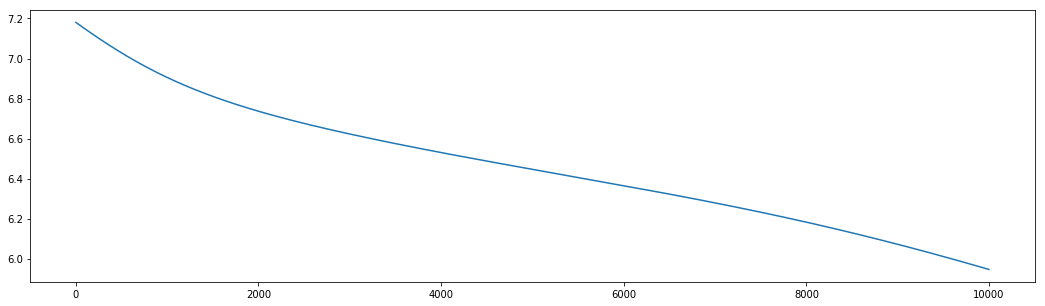

In [131]:
y_var = y.var(axis=0)
y_mean = y.mean(axis=0)
yy = np.tanh((y - y_mean) / (y_var**0.5))
print(yy.var(axis=0), yy.mean(axis=0), yy.min(), yy.max())
# yy = np.arctanh(yy) * (y_var**0.5) + y_mean

import torch
from torch.autograd import Variable
dtype = torch.FloatTensor
D_in, D_h, D_out = x.shape[1], 40, yy.shape[1]
X = Variable(torch.from_numpy(x).type(dtype), requires_grad=False)
Y = Variable(torch.from_numpy(yy).type(dtype), requires_grad=False)
w1 = Variable(torch.randn(D_in, D_h).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(D_h, D_out).type(dtype), requires_grad=True)
logistic = lambda net_in: tanh(net_in)
dlogistic = lambda out: 1 - tanh(out) ** 2

learning_rate = 1e-4
error_plot = np.full(10000, np.nan)
for i in range(len(error_plot)):
    if not w1.grad is None: w1.grad.zero_()
    if not w2.grad is None: w2.grad.zero_()
    
    h = torch.tanh(X.mm(w1))
    y_pred = torch.tanh(h.mm(w2))

    loss = (y_pred - Y).pow(2).sum() / len(y_pred)
    error_plot[i] = loss
    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    
plt.plot(error_plot)
error_plot[-1]

In [136]:
error_plot = np.full(500000, np.nan)
learning_rate = 5e-5
for i in range(len(error_plot)):
        
    if not w1.grad is None: w1.grad.zero_()
    if not w2.grad is None: w2.grad.zero_()
    h = torch.tanh(X.mm(w1))
    y_pred = torch.tanh(h.mm(w2))

    loss = (y_pred - Y).pow(2).sum() / len(y_pred)
    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    
    error_plot[i] = loss    
    if i > 0 and i % 10000 == 0:
        print('iteration #', i, loss.data.numpy())
    
plt.plot(error_plot)
error_plot[-1]

iteration # 10000 [ 1.92366254]
iteration # 20000 [ 1.88575292]
iteration # 30000 [ 1.85090506]
iteration # 40000 [ 1.8192867]
iteration # 50000 [ 1.79068625]
iteration # 60000 [ 1.76486921]
iteration # 70000 [ 1.74158752]
iteration # 80000 [ 1.72049391]
iteration # 90000 [ 1.70139027]
iteration # 100000 [ 1.68403602]
iteration # 110000 [ 1.66815364]
iteration # 120000 [ 1.65370572]
iteration # 130000 [ 1.64042318]
iteration # 140000 [ 1.6282239]
iteration # 150000 [ 1.61692703]
iteration # 160000 [ 1.60648239]
iteration # 170000 [ 1.59686136]
iteration # 180000 [ 1.58792806]
iteration # 190000 [ 1.57960308]
iteration # 200000 [ 1.57184792]
iteration # 210000 [ 1.56458759]
iteration # 220000 [ 1.55777609]
iteration # 230000 [ 1.55141115]
iteration # 240000 [ 1.54543221]
iteration # 250000 [ 1.53977001]
iteration # 260000 [ 1.53444123]
iteration # 270000 [ 1.52938592]
iteration # 280000 [ 1.52455461]
iteration # 290000 [ 1.51997674]


KeyboardInterrupt: 

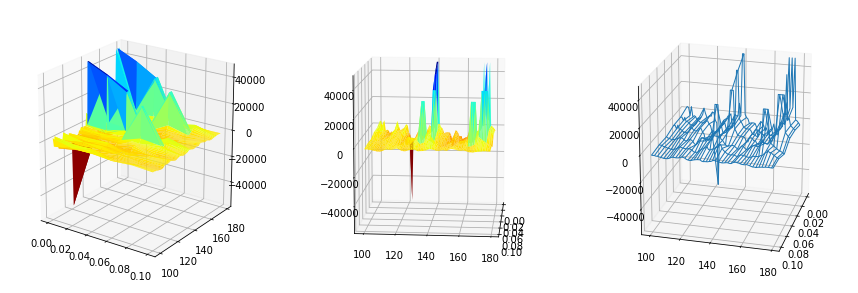

In [137]:
y_pred = X.mm(w1).mm(w2)
y_pred.data.numpy()
yyy = np.arctanh(y_pred.data.numpy().clip(min=-0.999999, max=0.999999)) * (y_var**0.5) + y_mean

window_start = 100
window_size = 80
plot_X = max_dds
plot_Y = np.arange(window_start, window_start + window_size)
plot_Z = yyy[window_start:window_start + window_size]
plot_X, plot_Y = np.meshgrid(plot_X, plot_Y)
plot_X.shape, plot_Y.shape, plot_Z.shape

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(1/3)*1)
ax = fig.add_subplot(131, projection='3d')
ax.view_init(elev=20., azim=-55.)
ax.plot_trisurf(plot_X.ravel(), plot_Y.ravel(), plot_Z.ravel(), linewidth=0.1, cmap='jet_r')
ax2 = fig.add_subplot(132, projection='3d')
ax2.view_init(elev=10., azim=5.)
ax2.plot_trisurf(plot_X.ravel(), plot_Y.ravel(), plot_Z.ravel(), cmap='jet_r')
ax3 = fig.add_subplot(133, projection='3d')
ax3.view_init(elev=20., azim=15.)
# ax3.plot_trisurf(plot_X.ravel(), plot_Y.ravel(), plot_Z.ravel(), linewidth=0.1, cmap='jet_r')
ax3.plot_wireframe(plot_X, plot_Y, plot_Z, linewidth=1, cmap='jet_r')

In [107]:
(y - yyy).sum()

-1288645.0761674545